In [6]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import Cdf
import Pmf
import math

import warnings
warnings.filterwarnings('ignore')

%pylab inline
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Populating the interactive namespace from numpy and matplotlib


In [7]:
def rounddown(x):
     return x if x % 500 == 0 else x - x % 500

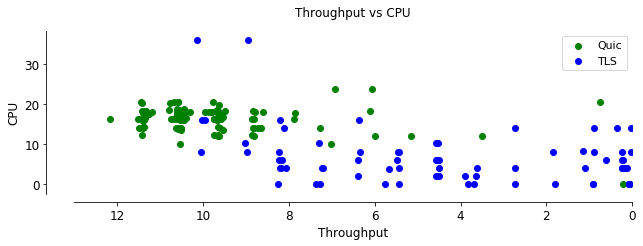

In [8]:
quic_cpu = "/home/rohit/Quic/throughput_youtube/1QUIC/Q044_cpu.csv"
tcp_cpu = "/home/rohit/Quic/throughput_youtube/1TCP/tcp_cpu.csv"

quic =  pd.read_csv(quic_cpu,',')
tcp = pd.read_csv(tcp_cpu, ',')

quic['Progress'] = quic['Timestamp'].apply(lambda x: x  - quic['Timestamp'].min() )
tcp['Progress'] = tcp['Timestamp'].apply(lambda x: x   - tcp['Timestamp'].min() )

quic_throughput = "/home/rohit/Quic/throughput_youtube/1QUIC/Q044_throughput.csv"
tcp_throughput = "/home/rohit/Quic/throughput_youtube/1TCP/throughput_1TCP.csv"

quic_t =  pd.read_csv(quic_throughput,',')
tcp_t = pd.read_csv(tcp_throughput, ',')

quic_t['Progress'] = quic_t['Timestamp'].apply(lambda x: x - quic_t['Timestamp'].min())
quic_t['Throughput in MB/s'] = quic_t['download'].apply(lambda x: x / 1000)

tcp_t['Progress'] = tcp_t['Timestamp'].apply(lambda x: x - tcp_t['Timestamp'].min())
tcp_t['Throughput in MB/s'] = tcp_t['download'].apply(lambda x: x / 1000)

quic['Progress'] = quic['Progress'].apply(rounddown)
quic_t['Progress'] = quic_t['Progress'].apply(rounddown)
tcp['Progress'] = tcp['Progress'].apply(rounddown)
tcp_t['Progress'] = tcp_t['Progress'].apply(rounddown)

scatter_quic= quic[['Progress', 'CPU']].copy()
scatter_quic = scatter_quic.join(quic_t.set_index('Progress'), on='Progress', rsuffix='_right')
scatter_quic = scatter_quic.dropna()  

scatter_tcp= tcp[['Progress', 'CPU']].copy()
scatter_tcp = scatter_tcp.join(tcp_t.set_index('Progress'), on='Progress', rsuffix='_right')
scatter_tcp = scatter_tcp.dropna()  

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
ax.set_xlim([13, 0])
plt.scatter(scatter_quic['Throughput in MB/s'], scatter_quic['CPU'], marker='o', c='green')
plt.scatter(scatter_tcp['Throughput in MB/s'], scatter_tcp['CPU'], marker='o', c='blue')

ax = fig.axes[0]
ax.grid(False)

ax.set_xscale('linear')
ax.set_xlabel('Throughput', fontsize=12)
ax.set_ylabel('CPU', fontsize=12)

plt.legend(['Quic', 'TLS'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('Throughput vs CPU', fontsize=12, y=1.05)
plt.savefig('./plots/youtube/throughputvscpu/ThroughputvsCPU.png', format='png', bbox_inches='tight')

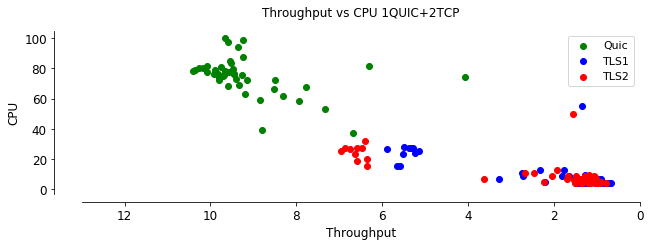

In [9]:
throughput = "./data/pi-1/Throughput/2TCP1QUIC/2tls1QUIC_throughput_200MB.csv"
t = pd.read_csv(throughput,',')

quic_t = t.loc[t['PID'] == 18894]
tcp_t_2 = t.loc[t['PID'] == 18889]
tcp_t = t.loc[t['PID'] == 18891]

quic_t['Progress'] = quic_t['Timestamp'].apply(lambda x: x - quic_t['Timestamp'].min())
quic_t['Throughput in MB/s'] = quic_t['download'].apply(lambda x: x / 1000)

tcp_t_2['Progress'] = tcp_t_2['Timestamp'].apply(lambda x: x - tcp_t_2['Timestamp'].min())
tcp_t_2['Throughput in MB/s'] = tcp_t_2['download'].apply(lambda x: x / 1000)

tcp_t['Progress'] = tcp_t['Timestamp'].apply(lambda x: x - tcp_t['Timestamp'].min())
tcp_t['Throughput in MB/s'] = tcp_t['download'].apply(lambda x: x / 1000)

tcp_cpu = "./data/pi-1/Throughput/2TCP1QUIC/tls_cpu_1.csv"
tcp = pd.read_csv(tcp_cpu, ',')
tcp['Progress'] = tcp['Timestamp'].apply(lambda x: x   - tcp['Timestamp'].min() )


tcp_2_cpu = "./data/pi-1/Throughput/2TCP1QUIC/tls_cpu_2.csv"
tcp_2 = pd.read_csv(tcp_2_cpu, ',')
tcp_2['Progress'] = tcp_2['Timestamp'].apply(lambda x: x   - tcp_2['Timestamp'].min() )

quic_cpu = "./data/pi-1/Throughput/2TCP1QUIC/Q044_cpu_3.csv"
quic =  pd.read_csv(quic_cpu,',')
quic['Progress'] = quic['Timestamp'].apply(lambda x: x  - quic['Timestamp'].min() )

quic['Progress'] = quic['Progress'].apply(rounddown)
quic_t['Progress'] = quic_t['Progress'].apply(rounddown)
tcp['Progress'] = tcp['Progress'].apply(rounddown)
tcp_t['Progress'] = tcp_t['Progress'].apply(rounddown)
tcp_2['Progress'] = tcp_2['Progress'].apply(rounddown)
tcp_t_2['Progress'] = tcp_t_2['Progress'].apply(rounddown)

scatter_quic= quic[['Progress', 'CPU']].copy()
scatter_quic = scatter_quic.join(quic_t.set_index('Progress'), on='Progress', rsuffix='_right')
scatter_quic = scatter_quic.dropna()  

scatter_tcp= tcp[['Progress', 'CPU']].copy()
scatter_tcp = scatter_tcp.join(tcp_t.set_index('Progress'), on='Progress', rsuffix='_right')
scatter_tcp = scatter_tcp.dropna()  

scatter_tcp_2= tcp_2[['Progress', 'CPU']].copy()
scatter_tcp_2 = scatter_tcp_2.join(tcp_t_2.set_index('Progress'), on='Progress', rsuffix='_right')
scatter_tcp_2 = scatter_tcp_2.dropna()  

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
ax.set_xlim([13, 0])
plt.scatter(scatter_quic['Throughput in MB/s'], scatter_quic['CPU'], marker='o', c='green')
plt.scatter(scatter_tcp['Throughput in MB/s'], scatter_tcp['CPU'], marker='o', c='blue')
plt.scatter(scatter_tcp_2['Throughput in MB/s'], scatter_tcp_2['CPU'], marker='o', c='red')

ax = fig.axes[0]
ax.grid(False)

ax.set_xscale('linear')
ax.set_xlabel('Throughput', fontsize=12)
ax.set_ylabel('CPU', fontsize=12)

plt.legend(['Quic', 'TLS1', 'TLS2'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('Throughput vs CPU 1QUIC+2TCP', fontsize=12, y=1.05)
plt.savefig('./plots/PI/throughputvscpu/ThroughputvsCPU_QUIC+2TCP.png', format='png', bbox_inches='tight')

In [10]:
throughput = "/home/rohit/Quic/throughput_youtube/2TCP/throughput_2TCP.csv"
t = pd.read_csv(throughput,',')

tcp_t_2 = t.loc[t['PID'] == 18845]
tcp_t = t.loc[t['PID'] == 18847]

tcp_t_2['Progress'] = tcp_t_2['Timestamp'].apply(lambda x: x - tcp_t_2['Timestamp'].min())
tcp_t_2['Throughput in MB/s'] = tcp_t_2['download'].apply(lambda x: x / 1000)

tcp_t['Progress'] = tcp_t['Timestamp'].apply(lambda x: x - tcp_t['Timestamp'].min())
tcp_t['Throughput in MB/s'] = tcp_t['download'].apply(lambda x: x / 1000)

tcp_cpu = "/home/rohit/Quic/throughput_youtube/2TCP/tcp_cpu_1.csv"
tcp = pd.read_csv(tcp_cpu, ',')
tcp['Progress'] = tcp['Timestamp'].apply(lambda x: x   - tcp['Timestamp'].min() )

tcp_2_cpu = "/home/rohit/Quic/throughput_youtube/2TCP/tcp_cpu_2.csv"
tcp_2 = pd.read_csv(tcp_2_cpu, ',')
tcp_2['Progress'] = tcp_2['Timestamp'].apply(lambda x: x   - tcp_2['Timestamp'].min() )


tcp['Progress'] = tcp['Progress'].apply(rounddown)
tcp_t['Progress'] = tcp_t['Progress'].apply(rounddown)
tcp_2['Progress'] = tcp_2['Progress'].apply(rounddown)
tcp_t_2['Progress'] = tcp_t_2['Progress'].apply(rounddown)

scatter_tcp= tcp[['Progress', 'CPU']].copy()
scatter_tcp = scatter_tcp.join(tcp_t.set_index('Progress'), on='Progress', rsuffix='_right')
scatter_tcp = scatter_tcp.dropna()  

scatter_tcp_2= tcp_2[['Progress', 'CPU']].copy()
scatter_tcp_2 = scatter_tcp_2.join(tcp_t_2.set_index('Progress'), on='Progress', rsuffix='_right')
scatter_tcp_2 = scatter_tcp_2.dropna()  

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
ax.set_xlim([13, 0])
plt.scatter(scatter_tcp['Throughput in MB/s'], scatter_tcp['CPU'], marker='o', c='blue')

#plt.plot(np.unique(scatter_tcp['Throughput in MB/s']), np.poly1d(np.polyfit(scatter_tcp['Throughput in MB/s'], scatter_tcp['CPU'], 1))(np.unique(scatter_tcp['Throughput in MB/s'])))

plt.scatter(scatter_tcp_2['Throughput in MB/s'], scatter_tcp_2['CPU'], marker='o', c='red')

ax = fig.axes[0]
ax.grid(False)

ax.set_xscale('linear')
ax.set_xlabel('Throughput', fontsize=12)
ax.set_ylabel('CPU', fontsize=12)

plt.legend([ 'TLS1', 'TLS2'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('Throughput vs CPU 2TCP', fontsize=12, y=1.05)
plt.savefig('./plots/youtube/throughputvscpu/ThroughputvsCPU_2TCP.png', format='png', bbox_inches='tight')

EmptyDataError: No columns to parse from file